## 1.4 Masking: from grid to country-averaged timeseries


Here, we will load the downloaded SEAS5 data and EOBS and compare the UK averaged precipitation.

### Import packages

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [60]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import regionmask

In [3]:
##We want the working directory to be the UNSEEN-open directory
pwd = os.getcwd() ##current working directory is UNSEEN-open/Notebooks/1.Download
pwd #print the present working directory
os.chdir(pwd+'/../../') # Change the working directory to UNSEEN-open
os.getcwd() #print the working directory

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open/Notebooks/1.Download'

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open'

## Load EOBS and SEAS5

Here I will compare SEAS5 to the EOBS historical precipitation. 

In [4]:
EOBS = xr.open_dataset('../UK_example/EOBS/EOBS.nc')
EOBS

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 71)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-02-28 1951-02-28 ... 2020-02-29
Data variables:
    rr         (time, latitude, longitude) float32 ...

In [5]:
SEAS5 = xr.open_dataset('../UK_example/SEAS5/SEAS5.nc')
SEAS5

<xarray.Dataset>
Dimensions:    (latitude: 11, leadtime: 5, longitude: 14, number: 25, time: 35)
Coordinates:
  * longitude  (longitude) float32 -11.0 -10.0 -9.0 -8.0 ... -1.0 0.0 1.0 2.0
  * time       (time) datetime64[ns] 1982-02-01 1983-02-01 ... 2016-02-01
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 ... 53.0 52.0 51.0 50.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * leadtime   (leadtime) int64 2 3 4 5 6
Data variables:
    tprate     (leadtime, time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 14:49:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Load the shapefile

Regionmask has predefined countries from [Natural Earth datasets](http://www.naturalearthdata.com) (shapefiles).



In [6]:
countries = regionmask.defined_regions.natural_earth.countries_110
countries

177 'Natural Earth Countries: 110m' Regions (http://www.naturalearthdata.com)
FJ TZ WS CA US KZ UZ PG INDO AR CL DRC SO KE SD TD HT DO RUS BS FK N GL TF TL ZA LS MX UY BR BO PE CO PA CR NI HN SV GT BZ VE GY SR F EC PR J CU ZW BW NA SN ML MR BJ NE NG CM TG GH CI GN GW LR SL BF CF CG GA GQ ZM MW MZ SW AO BI IS LB MG PAL GM TN DZ J AE QA KW IRQ OM VU KH TH LA MM VN KP KR MN IND BD BT NP PK AF TJ KG TM IRN SYR ARM S BY UA PL A HU MD RO LT LV EST D BG GR TR AL HR CH L B NL P E IRL NC SB NZ AU LK CN TW I DK GB IS AZ GE PH MY BN SLO FIN SK CZ ER J PY YE SA AQ CN CY MA EG LY ET DJ SL UG RW BiH MK RS ME KO TT SS

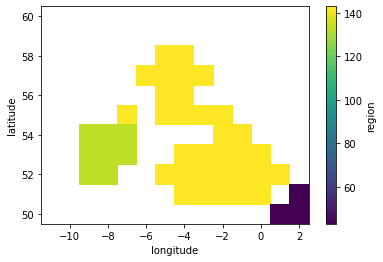

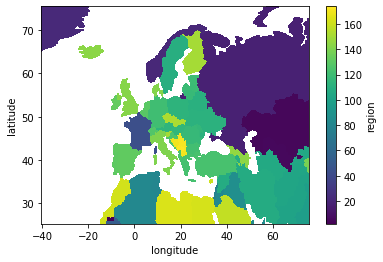

In [7]:
SEAS5_mask = countries.mask(SEAS5.sel(leadtime = 2,number=0,time='1982'),lon_name='longitude',lat_name='latitude')
SEAS5_mask.plot()
plt.show()
EOBS_mask = countries.mask(EOBS.sel(time='1982'),lon_name='longitude',lat_name='latitude')
EOBS_mask.plot()
plt.show()

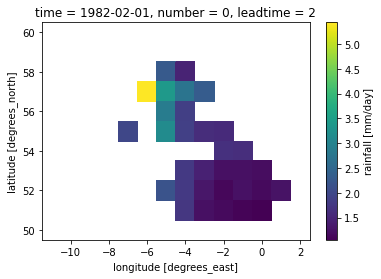

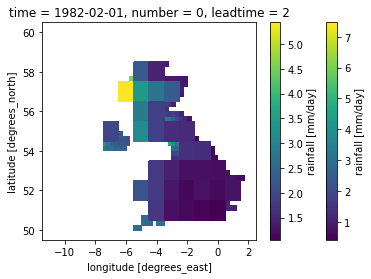

In [8]:
SEAS5['tprate'].sel(leadtime = 2,number=0,time='1982').where(SEAS5_mask == 143).plot()
plt.show()
EOBS['rr'].sel(time='1982').where(EOBS_mask == 143).plot()
# SEAS5['tprate'].sel(leadtime = 2,number=0,time='1982').where(SEAS5_mask == 143).plot()


<ipython-input-11-c3e001e833aa>:1: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.OSGB()})
/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'SEAS5')

Text(0.5, 1.0, 'EOBS')

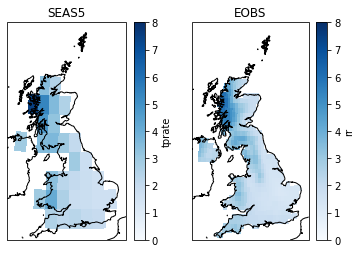

In [11]:
fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.OSGB()})

SEAS5['tprate'].where(SEAS5_mask == 143).mean(dim = ['time','leadtime','number']).where(SEAS5_mask == 143).plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[0])  #,cmap=plt.cm.Blues,
EOBS['rr'].where(EOBS_mask == 143).mean('time').plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[1])
# EOBS2020['rr'].plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[2])

for ax in axs.flat:
    ax.coastlines(resolution='10m')
    
axs[0].set_title('SEAS5')
axs[1].set_title('EOBS')
# axs[2].set_title('EOBS 2020')

In [49]:
Quantiles.time
EOBS.time

<xarray.DataArray 'time' (time: 35)>
array(['1982-02-01T00:00:00.000000000', '1983-02-01T00:00:00.000000000',
       '1984-02-01T00:00:00.000000000', '1985-02-01T00:00:00.000000000',
       '1986-02-01T00:00:00.000000000', '1987-02-01T00:00:00.000000000',
       '1988-02-01T00:00:00.000000000', '1989-02-01T00:00:00.000000000',
       '1990-02-01T00:00:00.000000000', '1991-02-01T00:00:00.000000000',
       '1992-02-01T00:00:00.000000000', '1993-02-01T00:00:00.000000000',
       '1994-02-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1996-02-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1998-02-01T00:00:00.000000000', '1999-02-01T00:00:00.000000000',
       '2000-02-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2002-02-01T00:00:00.000000000', '2003-02-01T00:00:00.000000000',
       '2004-02-01T00:00:00.000000000', '2005-02-01T00:00:00.000000000',
       '2006-02-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2008-02-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1982-02-01 1983-02-01 ... 2016-02-01
Attributes:
    long_name:  time

<xarray.DataArray 'time' (time: 71)>
array(['1950-02-28T00:00:00.000000000', '1951-02-28T00:00:00.000000000',
       '1952-02-29T00:00:00.000000000', '1953-02-28T00:00:00.000000000',
       '1954-02-28T00:00:00.000000000', '1955-02-28T00:00:00.000000000',
       '1956-02-29T00:00:00.000000000', '1957-02-28T00:00:00.000000000',
       '1958-02-28T00:00:00.000000000', '1959-02-28T00:00:00.000000000',
       '1960-02-29T00:00:00.000000000', '1961-02-28T00:00:00.000000000',
       '1962-02-28T00:00:00.000000000', '1963-02-28T00:00:00.000000000',
       '1964-02-29T00:00:00.000000000', '1965-02-28T00:00:00.000000000',
       '1966-02-28T00:00:00.000000000', '1967-02-28T00:00:00.000000000',
       '1968-02-29T00:00:00.000000000', '1969-02-28T00:00:00.000000000',
       '1970-02-28T00:00:00.000000000', '1971-02-28T00:00:00.000000000',
       '1972-02-29T00:00:00.000000000', '1973-02-28T00:00:00.000000000',
       '1974-02-28T00:00:00.000000000', '1975-02-28T00:00:00.000000000',
       '1976-02-29T00:00:00.000000000', '1977-02-28T00:00:00.000000000',
       '1978-02-28T00:00:00.000000000', '1979-02-28T00:00:00.000000000',
       '1980-02-29T00:00:00.000000000', '1981-02-28T00:00:00.000000000',
       '1982-02-28T00:00:00.000000000', '1983-02-28T00:00:00.000000000',
       '1984-02-29T00:00:00.000000000', '1985-02-28T00:00:00.000000000',
       '1986-02-28T00:00:00.000000000', '1987-02-28T00:00:00.000000000',
       '1988-02-29T00:00:00.000000000', '1989-02-28T00:00:00.000000000',
       '1990-02-28T00:00:00.000000000', '1991-02-28T00:00:00.000000000',
       '1992-02-29T00:00:00.000000000', '1993-02-28T00:00:00.000000000',
       '1994-02-28T00:00:00.000000000', '1995-02-28T00:00:00.000000000',
       '1996-02-29T00:00:00.000000000', '1997-02-28T00:00:00.000000000',
       '1998-02-28T00:00:00.000000000', '1999-02-28T00:00:00.000000000',
       '2000-02-29T00:00:00.000000000', '2001-02-28T00:00:00.000000000',
       '2002-02-28T00:00:00.000000000', '2003-02-28T00:00:00.000000000',
       '2004-02-29T00:00:00.000000000', '2005-02-28T00:00:00.000000000',
       '2006-02-28T00:00:00.000000000', '2007-02-28T00:00:00.000000000',
       '2008-02-29T00:00:00.000000000', '2009-02-28T00:00:00.000000000',
       '2010-02-28T00:00:00.000000000', '2011-02-28T00:00:00.000000000',
       '2012-02-29T00:00:00.000000000', '2013-02-28T00:00:00.000000000',
       '2014-02-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2016-02-29T00:00:00.000000000', '2017-02-28T00:00:00.000000000',
       '2018-02-28T00:00:00.000000000', '2019-02-28T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-02-28 1951-02-28 ... 2020-02-29

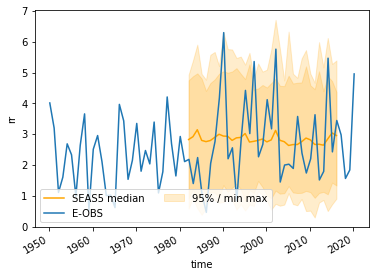

In [59]:
ax = plt.axes()

Quantiles = SEAS5['tprate'].where(SEAS5_mask == 143).mean(dim = ['latitude','longitude']).quantile([0,2.5/100, 0.5, 97.5/100,1], dim=['number','leadtime'])
ax.plot(Quantiles.time, Quantiles.sel(quantile=0.5), color='orange',label = 'SEAS5 median')
ax.fill_between(Quantiles.time.values, Quantiles.sel(quantile=0.025), Quantiles.sel(quantile=0.975), color='orange', alpha=0.2,label = '95% / min max')
ax.fill_between(Quantiles.time.values, Quantiles.sel(quantile=0), Quantiles.sel(quantile=1), color='orange', alpha=0.2)

EOBS['rr'].where(EOBS_mask == 143).mean(dim = ['latitude','longitude']).plot(ax=ax,x='time',label = 'E-OBS')

# Quantiles_EOBS = EOBS['rr'].where(EOBS_mask == 143).mean(dim = ['latitude','longitude']).quantile([2.5/100, 0.5, 97.5/100], dim=['time'])#.plot()
# ax.plot(EOBS.time, np.repeat(Quantiles_EOBS.sel(quantile=0.5).values,71), color='blue',linestyle = '--',linewidth = 1)
# ax.plot(EOBS.time, np.repeat(Quantiles_EOBS.sel(quantile=2.5/100).values,71), color='blue',linestyle = '--',linewidth = 1)
# ax.plot(EOBS.time, np.repeat(Quantiles_EOBS.sel(quantile=97.5/100).values,71), color='blue',linestyle = '--',linewidth = 1)

plt.legend(loc = 'lower left', ncol=2 )#loc = (0.1, 0) upper left
